In [1]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

2024-11-21 17:28:18.502258: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-21 17:28:18.503003: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 17:28:18.506488: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 17:28:18.516321: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732202898.533543  164887 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732202898.53

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step


In [3]:
X_train = X_train.reshape(-1, 28*28).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28*28).astype(np.float32) / 255.0

In [4]:
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42)

In [5]:
# 4. Ініціалізація та тренування моделі kNN
knn = cv2.ml.KNearest_create()
knn.train(X_train_small, cv2.ml.ROW_SAMPLE, y_train_small.astype(np.float32))

True

In [6]:
k = 5  # кількість сусідів
_, results, _, _ = knn.findNearest(X_test, k)

In [7]:
accuracy = accuracy_score(y_test, results.flatten())
print(f"Точність класифікації на тестових даних: {accuracy * 100:.2f}%")

Точність класифікації на тестових даних: 91.53%


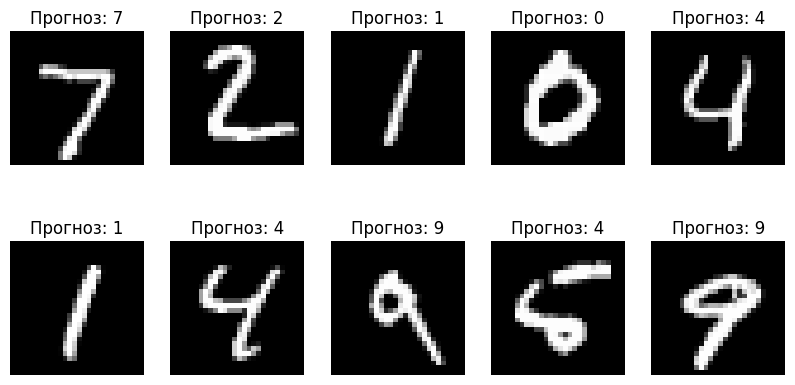

In [8]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Прогноз: {int(results[i][0])}")
    plt.axis('off')
plt.show()